# **Predvidjanje otkaza zaposlenih pomocu razlicitih metoda binarne klasifikacije**

## Uvod

Cilj ovog projekta je predviđanje
otkaza zaposlenih pomoću različitih metoda analize podataka.
Podaci o zaposlenima uključuju različite faktore kao što su nivo obrazovanja,
radni staž, lokacija u kojoj su zaposleni, nivo plate... Cilj je razviti modele koji
su sposobni da predviđaju moguće otkaze zaposlenih na osnovu ovih podataka.
Postoje mnogi modeli koji mogu biti korisni za rešavanje ovog problema.
Ovaj rad će se pretežno baviti korišćenjem modela Logistic Regression, Decision
Tree, Random Forests i Extreme Gradient Boosting, kako bi se postiglo što
uspešnije predviđanje otkaza


Podaci su sačinjeni od 9 kolona (atributa) i 4563 reda. Kolona čiju vrednost
želimo da predvidimo je LeaveOrNot koja ukazuje na to da li zaposleni napušta
firmu.

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [19]:
print(df.columns[df.isnull().any()])

Index([], dtype='object')


Podaci govore o 4653 zaposlena i sve vrednosti su ispravno unete.

# Vizuelizacija podataka

Potrebno je vizuelizovati podatke sa kojima se radi, kako bi se mogli izvuci zakljucci na osnovu statistickih podataka.

### Uticaj privremene besposlice

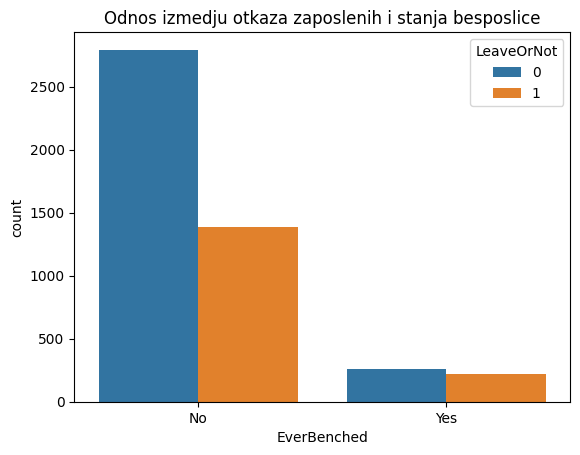

In [20]:
sns.countplot(x='EverBenched', hue='LeaveOrNot', data=df)
plt.title('Odnos izmedju otkaza zaposlenih i stanja besposlice')
plt.show()

In [12]:
# Assuming df is your DataFrame
df = pd.read_csv("Employee.csv")
# Proportions for employees who have been benched
benched_employees = df[df['EverBenched'] == 1]
left_benched_employees = benched_employees[benched_employees['LeaveOrNot'] == 1]

total_benched = len(benched_employees)
left_benched = len(left_benched_employees)
not_left_benched = total_benched - left_benched

# Proportions for employees who have not been benched
not_benched_employees = df[df['EverBenched'] == 0]
left_not_benched_employees = not_benched_employees[not_benched_employees['LeaveOrNot'] == 1]

total_not_benched = len(not_benched_employees)
left_not_benched = len(left_not_benched_employees)
not_left_not_benched = total_not_benched - left_not_benched

# Create a figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for employees who have been benched
axs[0].pie([left_benched, not_left_benched], labels=['Left', 'Not Left'],
           colors=['#FF9999', '#66B2FF'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Proportion of Employees Who Have Left Among Those Who Have Been Benched')
axs[0].axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Plot for employees who have not been benched
axs[1].pie([left_not_benched, not_left_not_benched], labels=['Left', 'Not Left'],
           colors=['#FF9999', '#66B2FF'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proportion of Employees Who Have Left Among Those Who Have Not Been Benched')
axs[1].axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()
df


F:\lib\site-packages\matplotlib\axes\_axes.py:3229: RuntimeWarning: invalid value encountered in divide
  x = x / sx


ValueError: cannot convert float NaN to integer

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 1200x600 with 2 Axes>

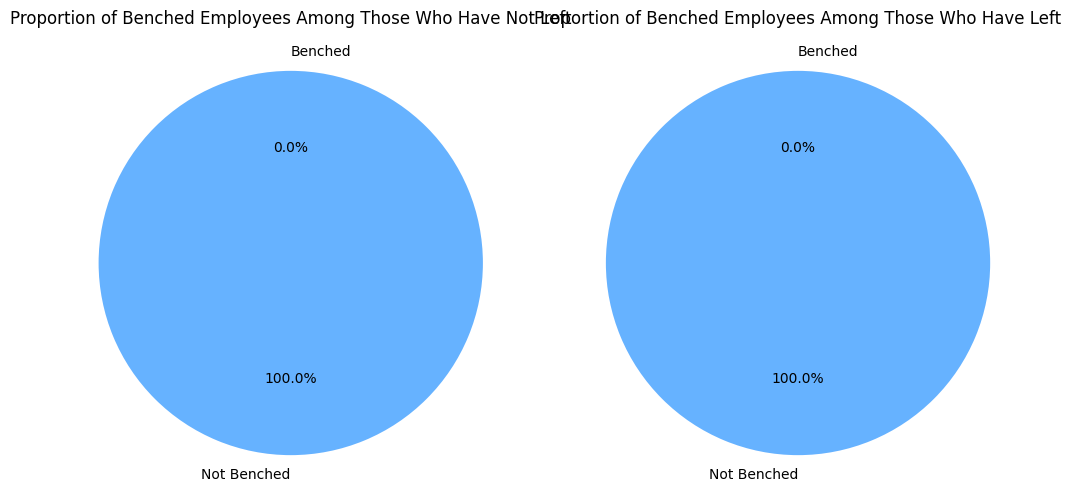

In [21]:

df = pd.read_csv("Employee.csv")
# Assuming df is your DataFrame

# Proportions for employees who have not left
not_left_employees = df[df['LeaveOrNot'] == 0]
benched_not_left_employees = not_left_employees[not_left_employees['EverBenched'] == 1]

total_not_left = len(not_left_employees)
benched_not_left = len(benched_not_left_employees)
not_benched_not_left = total_not_left - benched_not_left

# Proportions for employees who have left
left_employees = df[df['LeaveOrNot'] == 1]
benched_left_employees = left_employees[left_employees['EverBenched'] == 1]

total_left = len(left_employees)
benched_left = len(benched_left_employees)
not_benched_left = total_left - benched_left

# Create a figure with two subplots (side by side)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for employees who have not left
axs[0].pie([benched_not_left, not_benched_not_left], labels=['Benched', 'Not Benched'],
           colors=['#FF9999', '#66B2FF'], autopct='%1.1f%%', startangle=90)
axs[0].set_title('Proportion of Benched Employees Among Those Who Have Not Left')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Plot for employees who have left
axs[1].pie([benched_left, not_benched_left], labels=['Benched', 'Not Benched'],
           colors=['#FF9999', '#66B2FF'], autopct='%1.1f%%', startangle=90)
axs[1].set_title('Proportion of Benched Employees Among Those Who Have Left')
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()


Iz podataka se vidi kako besposlica nema velik direktan uticaj na otkaz zaposlenog, ali radnici koji su uvek imali posla su naklonjeniji da ostanu.

### Raspodela polova

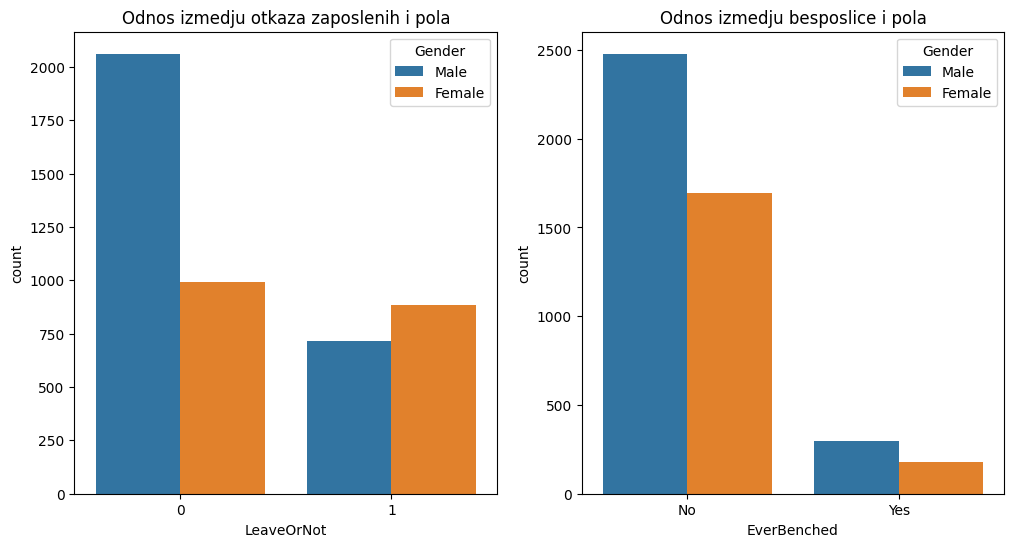

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='LeaveOrNot', hue='Gender', data=df)
plt.title('Odnos izmedju otkaza zaposlenih i pola')

plt.subplot(1, 2, 2)
sns.countplot(x='EverBenched', hue='Gender', data=df)
plt.title('Odnos izmedju besposlice i pola')

plt.show()

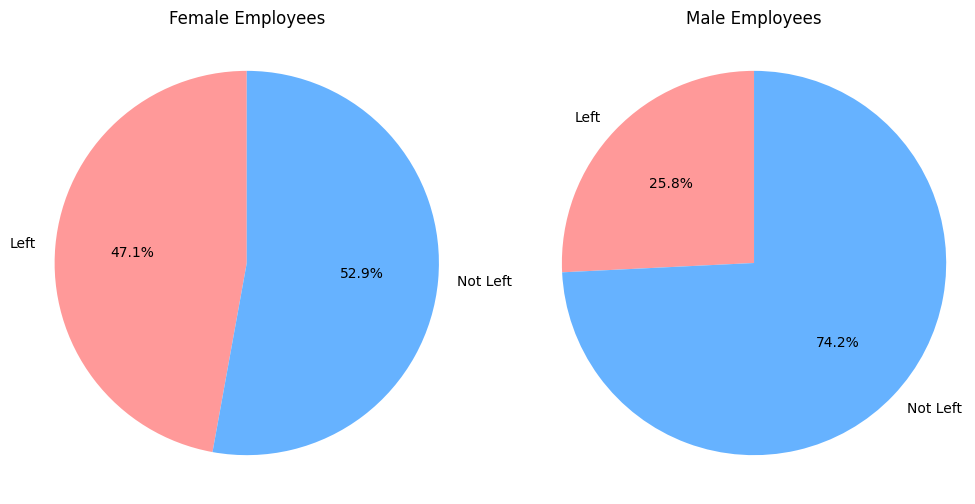

In [23]:
# Assuming df is your DataFrame
female_employees = df[df['Gender'] == 'Female']
male_employees = df[df['Gender'] == 'Male']

# Calculate proportions for females
total_female = len(female_employees)
left_female = len(female_employees[female_employees['LeaveOrNot'] == 1])
not_left_female = total_female - left_female

# Calculate proportions for males
total_male = len(male_employees)
left_male = len(male_employees[male_employees['LeaveOrNot'] == 1])
not_left_male = total_male - left_male

# Create a figure with two subplots (side-by-side)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for females
axs[0].pie([left_female, not_left_female], labels=['Left', 'Not Left'], colors=['#FF9999', '#66B2FF'],
           autopct='%1.1f%%', startangle=90)
axs[0].set_title('Female Employees')

# Plot for males
axs[1].pie([left_male, not_left_male], labels=['Left', 'Not Left'], colors=['#FF9999', '#66B2FF'],
           autopct='%1.1f%%', startangle=90)
axs[1].set_title('Male Employees')

# Equal aspect ratio ensures that pies are drawn as circles
axs[0].axis('equal')
axs[1].axis('equal')

plt.show()

Sa grafika se moze zakljuciti kako mnogo vise zena ima tendenciju da napusti firmu u odnosu na muskarce.

### Raspodela godina

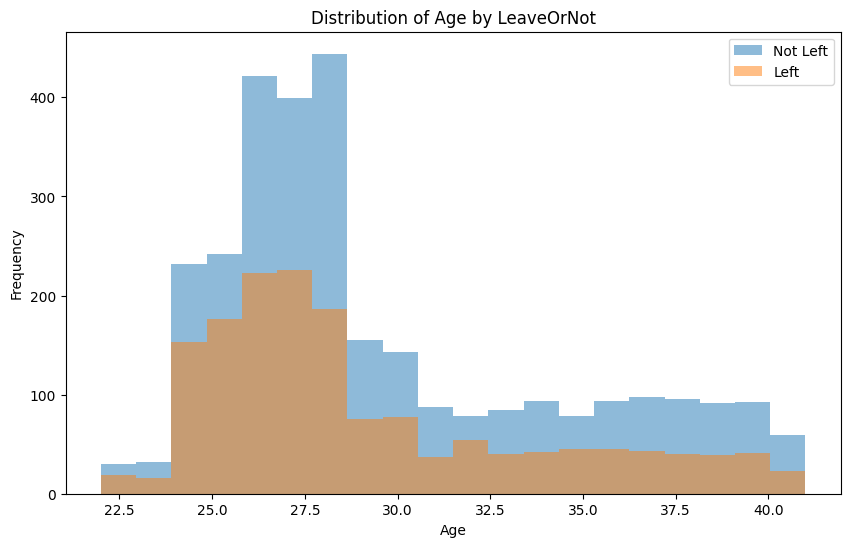

In [41]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df[df['LeaveOrNot'] == 0]['Age'], alpha=0.5, label='Not Left', bins=20)
plt.hist(df[df['LeaveOrNot'] == 1]['Age'], alpha=0.5, label='Left', bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Age by LeaveOrNot')
plt.show()


<Figure size 1500x600 with 0 Axes>

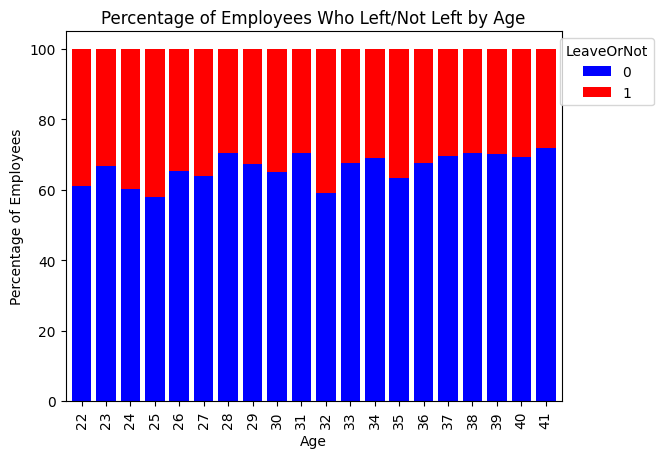

In [46]:
percentage_leave_by_age = df.groupby(['Age', 'LeaveOrNot']).size().unstack().div(df.groupby('Age').size(), axis=0) * 100

# Calculate the cumulative percentage of employees who have not left
percentage_leave_by_age[0] = 100 - percentage_leave_by_age[1].fillna(0)

# Plot the stacked bar plot
plt.figure(figsize=(15, 6))
percentage_leave_by_age.plot(kind='bar', stacked=True, color=['blue', 'red'], width=0.8)

plt.xlabel('Age')
plt.ylabel('Percentage of Employees')
plt.title('Percentage of Employees Who Left/Not Left by Age')
plt.legend(title='LeaveOrNot', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

### Uticaj plate i nivoa obrazovanja

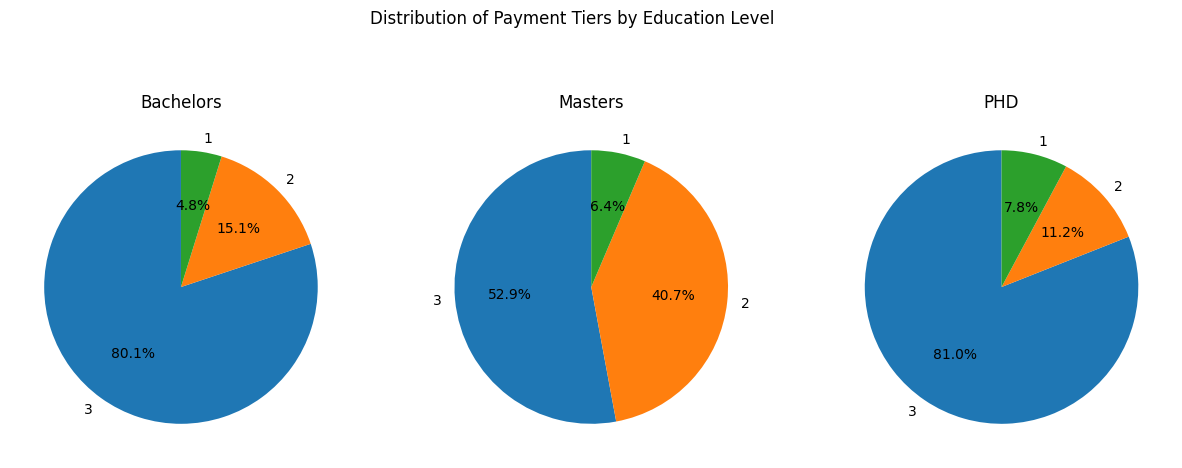

In [25]:
# Sample DataFrame creation (replace this with your actual DataFrame)


# Get unique education levels
education_levels = df['Education'].unique()

# Create subplots for each education level
fig, axs = plt.subplots(1, len(education_levels), figsize=(15, 5))

for i, education_level in enumerate(education_levels):
    subset = df[df['Education'] == education_level]
    payment_tier_counts = subset['PaymentTier'].value_counts()

    axs[i].pie(payment_tier_counts, labels=payment_tier_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{education_level}')

plt.suptitle('Distribution of Payment Tiers by Education Level', y=1.05)
plt.show()

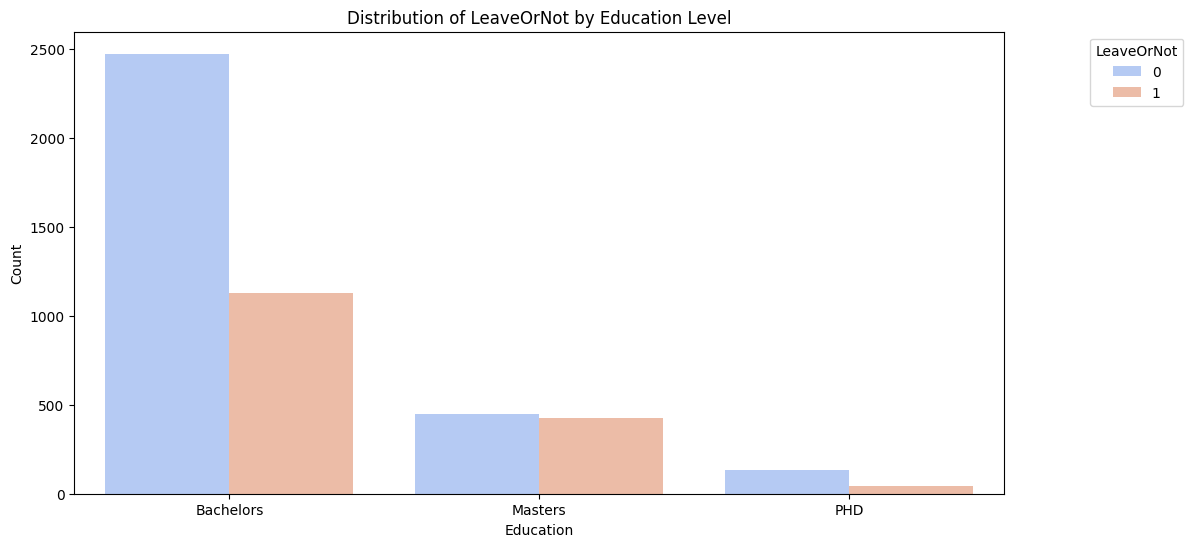

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Education', hue='LeaveOrNot', data=df, palette='coolwarm')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot by Education Level')
plt.legend(title='LeaveOrNot', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

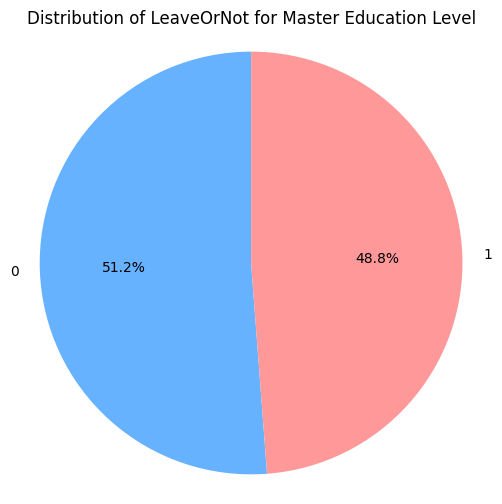

In [27]:
master_employees = df[df['Education'] == 'Masters']

# Count the occurrences of LeaveOrNot values
leave_not_leave_counts = master_employees['LeaveOrNot'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(leave_not_leave_counts, labels=leave_not_leave_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#66B2FF','#FF9999'])
plt.title('Distribution of LeaveOrNot for Master Education Level')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

Vidi se da skoro polovina zaposlenih sa masterom odlucuje da napusti firmu.

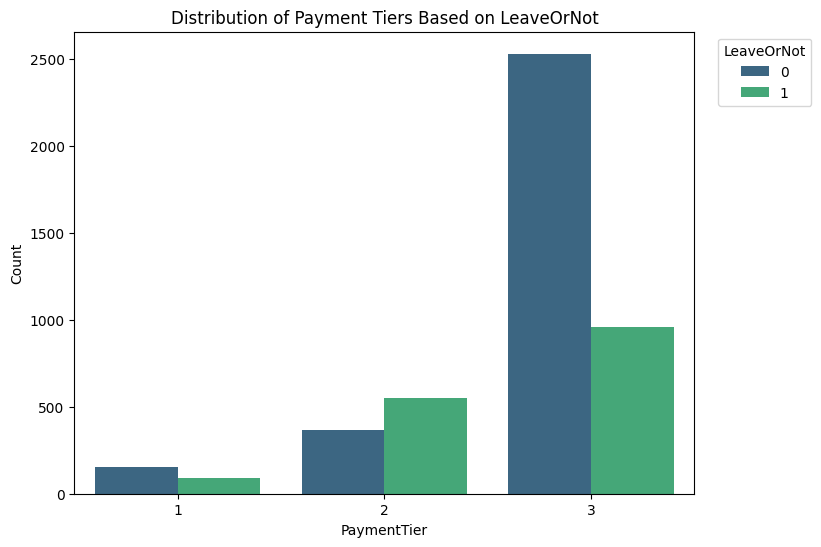

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentTier', hue='LeaveOrNot', data=df, palette='viridis')
plt.xlabel('PaymentTier')
plt.ylabel('Count')
plt.title('Distribution of Payment Tiers Based on LeaveOrNot')
plt.legend(title='LeaveOrNot', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

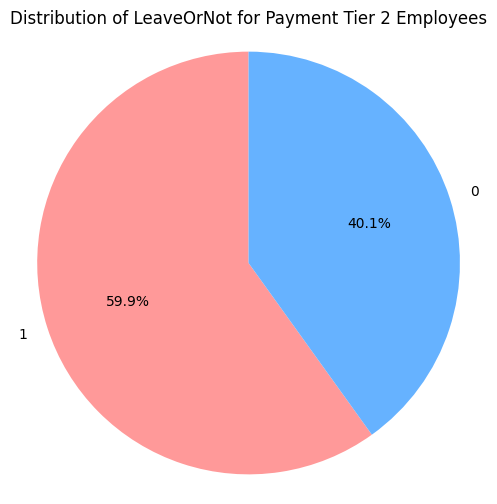

In [29]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Filter data for employees in Payment Tier 2
payment_tier_2_employees = df[df['PaymentTier'] == 2]

# Count the occurrences of LeaveOrNot values
leave_not_leave_counts = payment_tier_2_employees['LeaveOrNot'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(leave_not_leave_counts, labels=leave_not_leave_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of LeaveOrNot for Payment Tier 2 Employees')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()


Cak 2 trecine zaposlenih koji su imali srednji nivo plate su se odlucili za otkaz.

Potrebno je vrednosti kategorickih podataka pretvoriti u numericke.

In [30]:
df["Education"]= LabelEncoder().fit_transform(df["Education"])
df["City"]=LabelEncoder().fit_transform(df["City"])
df["Gender"]=LabelEncoder().fit_transform(df["Gender"])
df["EverBenched"]=LabelEncoder().fit_transform(df["EverBenched"])

### Uticaj godina rada u firmi

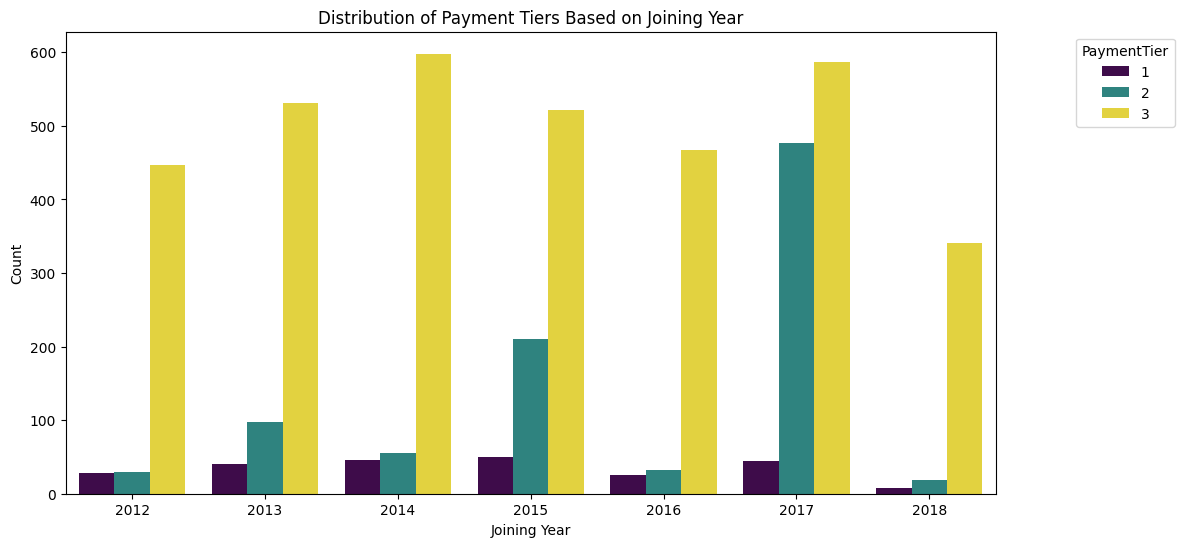

In [31]:
# Create a bar plot for the distribution of payment tiers based on JoiningYear
plt.figure(figsize=(12, 6))
sns.countplot(x='JoiningYear', hue='PaymentTier', data=df, palette='viridis')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Distribution of Payment Tiers Based on Joining Year')
plt.legend(title='PaymentTier', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

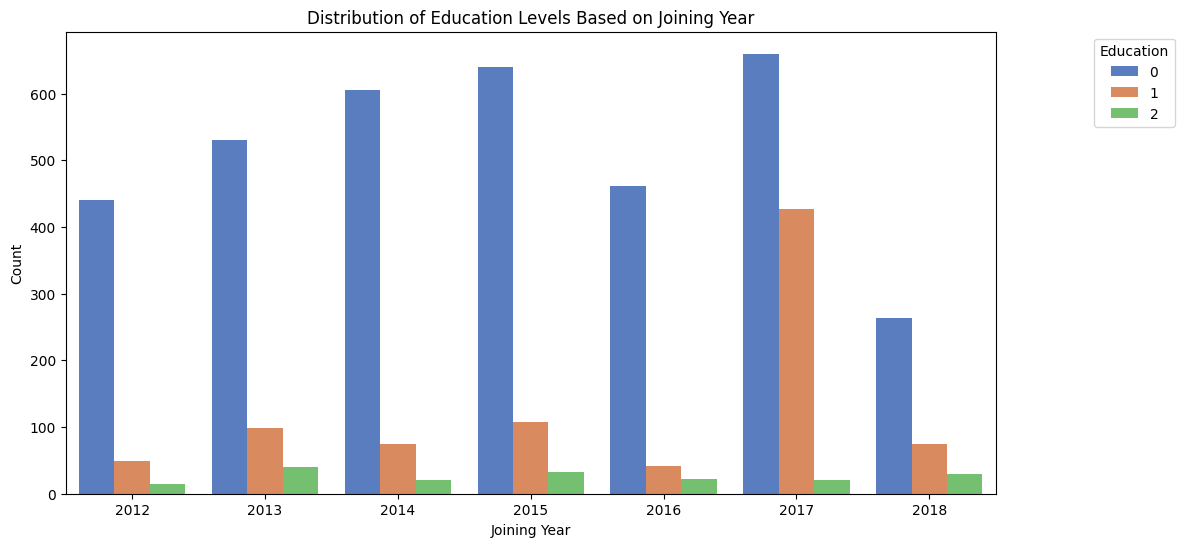

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JoiningYear', hue='Education', data=df, palette='muted')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Distribution of Education Levels Based on Joining Year')
plt.legend(title='Education', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

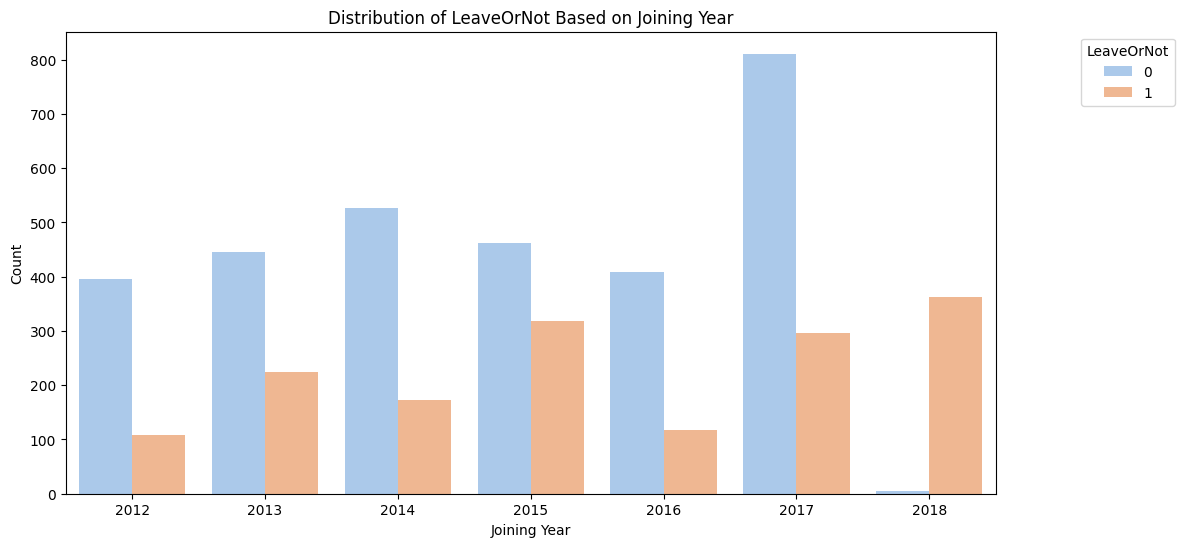

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JoiningYear', hue='LeaveOrNot', data=df, palette='pastel')
plt.xlabel('Joining Year')
plt.ylabel('Count')
plt.title('Distribution of LeaveOrNot Based on Joining Year')
plt.legend(title='LeaveOrNot', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

<Figure size 1200x600 with 0 Axes>

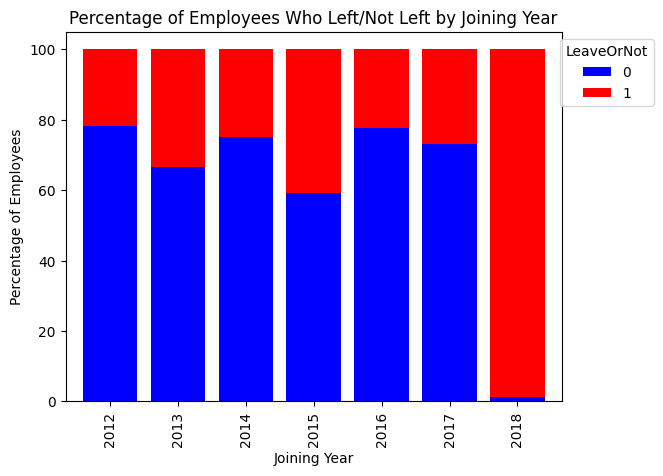

In [44]:
# Group by JoiningYear and LeaveOrNot and calculate the percentage of employees who have left
percentage_leave_by_year = df.groupby(['JoiningYear', 'LeaveOrNot']).size().unstack().div(df.groupby('JoiningYear').size(), axis=0) * 100

# Calculate the cumulative percentage of employees who have not left
percentage_leave_by_year[0] = 100 - percentage_leave_by_year[1].fillna(0)

# Plot the stacked bar plot
plt.figure(figsize=(12, 6))
percentage_leave_by_year.plot(kind='bar', stacked=True, color=['blue', 'red'], width=0.8)

plt.xlabel('Joining Year')
plt.ylabel('Percentage of Employees')
plt.title('Percentage of Employees Who Left/Not Left by Joining Year')
plt.legend(title='LeaveOrNot', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

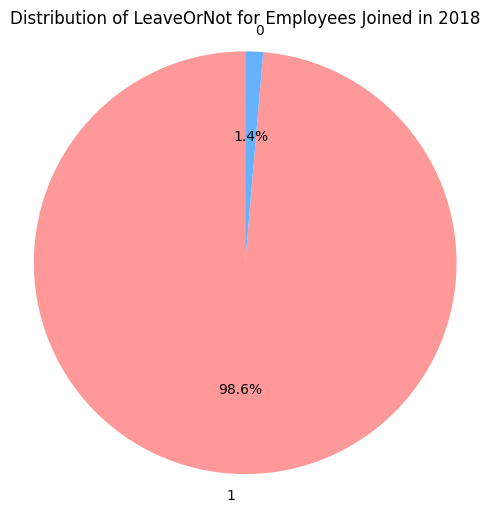

In [34]:
joined_2018_employees = df[df['JoiningYear'] == 2018]

# Count the occurrences of LeaveOrNot values
leave_not_leave_counts = joined_2018_employees['LeaveOrNot'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(leave_not_leave_counts, labels=leave_not_leave_counts.index, autopct='%1.1f%%', startangle=90,
        colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of LeaveOrNot for Employees Joined in 2018')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

Grafik prikazuje kako su skoro svi zaposleni koji su se pridruzili kompaniji 2018. godine dali otkaz.

### Matrica koorelacije

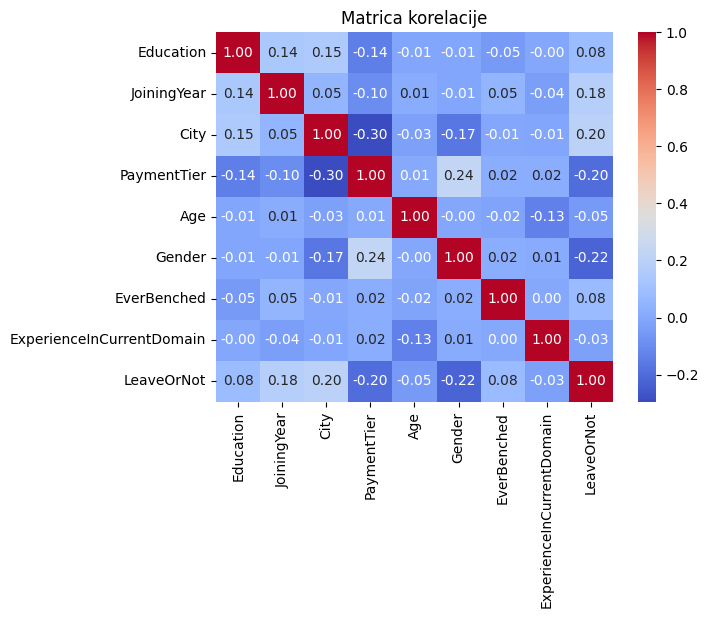

In [35]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrica korelacije")
plt.show()

Matrica korelacije nije toliko kljucna kao kod linearne regresije usled postojanja kategorickih argumenata.

## Podela podataka

Potrebno je sve podatke iz skupa podataka podeliti na test, trening i validacioni skup.

In [36]:
from sklearn.model_selection import train_test_split

X = df.drop('LeaveOrNot', axis=1)  # Features
y = df['LeaveOrNot']  # Target variable

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2791, 8)
X_valid shape: (931, 8)
X_test shape: (931, 8)
y_train shape: (2791,)
y_valid shape: (931,)
y_test shape: (931,)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions on the validation set
logreg_valid_preds = logreg_model.predict(X_valid)
dt_valid_preds = dt_model.predict(X_valid)
rf_valid_preds = rf_model.predict(X_valid)
xgb_valid_preds = xgb_model.predict(X_valid)

# Evaluate the models on the validation set
print("Logistic Regression Accuracy:", accuracy_score(y_valid, logreg_valid_preds))
print("Decision Tree Accuracy:", accuracy_score(y_valid, dt_valid_preds))
print("Random Forest Accuracy:", accuracy_score(y_valid, rf_valid_preds))
print("XGBoost Accuracy:", accuracy_score(y_valid, xgb_valid_preds))

# Additional evaluation metrics
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_valid, logreg_valid_preds))

print("\nClassification Report - Decision Tree:")
print(classification_report(y_valid, dt_valid_preds))

print("\nClassification Report - Random Forest:")
print(classification_report(y_valid, rf_valid_preds))

print("\nClassification Report - XGBoost:")
print(classification_report(y_valid, xgb_valid_preds))


logreg_test_preds = logreg_model.predict(X_test)
dt_test_preds = dt_model.predict(X_test)
rf_test_preds = rf_model.predict(X_test)
xgb_test_preds = xgb_model.predict(X_test)

# Evaluate the models on the test set
print("Logistic Regression Accuracy (Test):", accuracy_score(y_test, logreg_test_preds))
print("Decision Tree Accuracy (Test):", accuracy_score(y_test, dt_test_preds))
print("Random Forest Accuracy (Test):", accuracy_score(y_test, rf_test_preds))
print("XGBoost Accuracy (Test):", accuracy_score(y_test, xgb_test_preds))

# Additional evaluation metrics on the test set
print("\nClassification Report - Logistic Regression (Test):")
print(classification_report(y_test, logreg_test_preds))

print("\nClassification Report - Decision Tree (Test):")
print(classification_report(y_test, dt_test_preds))

print("\nClassification Report - Random Forest (Test):")
print(classification_report(y_test, rf_test_preds))

print("\nClassification Report - XGBoost (Test):")
print(classification_report(y_test, xgb_test_preds))

F:\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.706766917293233
Decision Tree Accuracy: 0.8098818474758325
Random Forest Accuracy: 0.8335123523093448
XGBoost Accuracy: 0.841031149301826

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       612
           1       0.64      0.33      0.43       319

    accuracy                           0.71       931
   macro avg       0.68      0.62      0.62       931
weighted avg       0.69      0.71      0.68       931


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       612
           1       0.76      0.66      0.70       319

    accuracy                           0.81       931
   macro avg       0.79      0.77      0.78       931
weighted avg       0.81      0.81      0.81       931


Classification Report - Random Forest:
              precision    recall  f1-score   supp

<Figure size 1000x600 with 0 Axes>

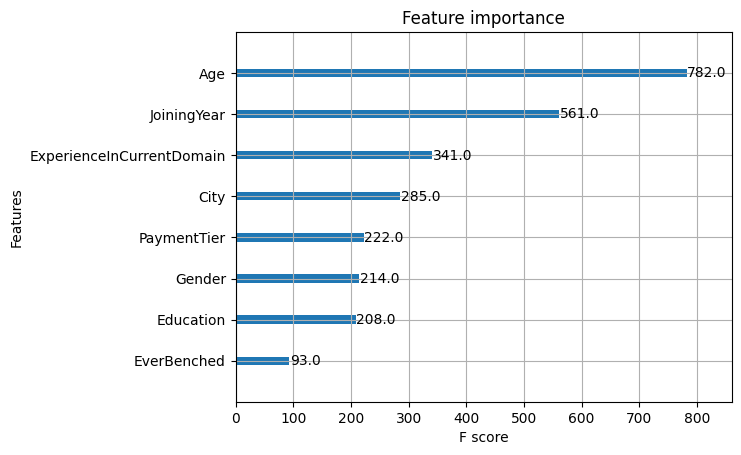

In [38]:
from xgboost import plot_importance

plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.show()

In [39]:
rf_feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)
print(rf_feature_importances)

                     Feature  Importance
1                JoiningYear    0.306547
4                        Age    0.175283
2                       City    0.126162
3                PaymentTier    0.099440
0                  Education    0.095324
7  ExperienceInCurrentDomain    0.092716
5                     Gender    0.086819
6                EverBenched    0.017710
